**구글드라이브 imoprt**





**필요한 모듈 import**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

import os
import cv2
import numpy as np
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.utils import shuffle  
import seaborn as sns
import cv2
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
import pandas as pd
from tqdm import tqdm
import os





**오류 발생하면 주석 지우고 설치 후 진행**






In [ ]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
libxrender-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow==2.6.0
!pip install keras~=2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 564.4 MB 168 kB/s
     |████████████████████████████████| 132 kB 9.0 MB/s 
     |████████████████████████████████| 14.8 MB 60.8 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=49b0a4d0d20a0d9e5ca2f5b15abf3037f2b2d4c733aeb983d466eb06ee0dcc49
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68710 sha256=38c72d311c7ffb925094c4c970f1540683111e4caeeb8633c2cdb0f13f618539
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 14.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 


**dict 형태로 클래스 라벨링**

In [ ]:
class_names = ['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
mapclass = {0 : 'bag', 1 : 'bed', 2 : 'chair', 3 : 'coffeetable', 4 : 'cup' , 5 : 'kitchentools', 6 : 'lamp', 7 : 'laptop', 8 : 'LivingSofa', 9 : 'pot', 10 : 'shoe'}

**이미지 경로 불러오기**

**아직 이미지로 처리한건 아니고 경로만 가져옴**

In [ ]:
from pathlib import Path
train_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train")
train_path.glob(r'**/*.png')

valid_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val")
valid_path.glob(r'**/*.png')

test_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val") # 테스트 경로 새로 입력받기
test_path.glob(r'**/*.png')

<generator object Path.glob at 0x7f89ec4ddc50>

**불러온 이미지 경로를 리스트 형태로 저장**

In [ ]:
train_filepath = list(train_path.glob(r'**/*.png'))
valid_filepath = list(valid_path.glob(r'**/*.png'))
test_filepath = list(test_path.glob(r'**/*.png'))

print(train_filepath)

[PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00001.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00002.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00016.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00014.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00009.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00018.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00010.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dat

**제대로 됐나 확인**

In [ ]:
for i in train_filepath:  
  num = str(i.stem)
  print(i)
  print(num)
  print(int(num[3:8]))

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')
for i in csv_file['file_name']:
  print(int(i[3:8]))

In [ ]:
os.path.split(os.path.split(train_filepath[0])[1]) 
    
    

('', 'img00000.png')

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

133

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

864

**리스트에 있는 이미지 경로 순서대로 라벨링**

In [ ]:
classes_train = []
classes_valid = []


In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for i in train_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_train.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [ ]:
print(len(classes_train))

864


In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val_data.csv')

for i in valid_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_valid.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [ ]:
print(len(classes_valid))

133


In [ ]:
print(len(classes_train))
print(len(classes_valid))

864
133


In [ ]:
print(classes_valid)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 4, 4, 4, 3, 2, 3, 3, 3, 3, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 8, 8, 7, 7, 8, 8, 8, 7, 8, 8, 7, 9, 8, 9, 8, 8, 9, 7, 8, 9, 7, 7, 9, 7, 7, 10, 9, 9, 10, 10, 10, 10, 9, 9, 10, 9, 10, 9, 10, 10, 9, 10, 9, 10, 9, 10, 10, 10]


**이미지 경로를 통해 이미지 저장**

In [ ]:
train_images = []
print(len(train_images))

0


In [ ]:
valid_images = []
print(len(valid_images))

0


In [ ]:
test_images = []

In [ ]:
for i in train_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  train_images.append(tmp)

In [ ]:
print(len(train_images))

864


In [ ]:
for i in valid_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  valid_images.append(tmp)

In [ ]:
print(len(valid_images))

133


In [ ]:
for i in test_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  train_images.append(tmp)

In [ ]:
valid_images = np.array(valid_images, dtype = 'float32') / 255

In [ ]:
train_images = np.array(train_images, dtype = 'float32') / 255

In [ ]:
classes_train = np.array(classes_train, dtype = 'int32')  

In [ ]:
classes_valid = np.array(classes_valid, dtype = 'int32')

In [ ]:
print(len(valid_images))
print(len(train_images))

133
864


****라벨링된 결과 시각화해서 확인하기****

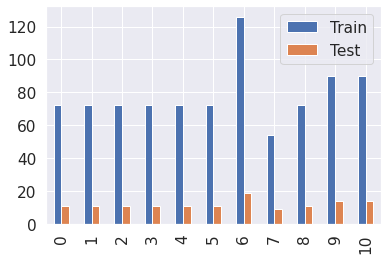

In [ ]:
df=pd.concat([pd.DataFrame(np.unique(classes_train,return_counts=True)).drop(0).rename(index={1:'Train'}).T,
              pd.DataFrame(np.unique(classes_valid,return_counts=True)).drop(0).rename(index={1:'Test'}).T],axis=1)
              
df.plot(kind='bar');

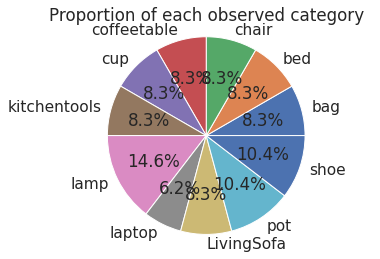

In [ ]:
plt.pie(df['Train'],
        explode=(0, 0, 0, 0, 0, 0,0,0,0,0,0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

**이미지가 잘 저장됐는지 확인**

In [ ]:
def displayimagebyindex(index,dset='Train'):
    if dset=='Train':
        img=train_images[index]
        lbl=list(pd.Series(classes_train[index]).map(mapclass))[0]
    else:
        img=valid_images[index]
        lbl=list(pd.Series(classes_valid[index]).map(mapclass))[0]
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('{} Image #{} : {}'.format(dset,index,lbl))
    plt.show()

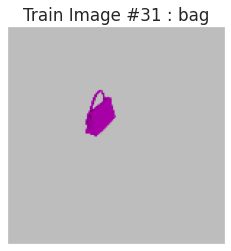

In [ ]:
displayimagebyindex(np.random.randint(0,800),dset='Train')

**모델 구축 시작**


**train_images에는 이미지가, classes_train에는 이미지의 클래스가 저장됨**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

**학습 시작**

In [ ]:
history = model.fit(train_images, classes_train, batch_size=128, epochs=20, validation_split = 0.2)
#history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
6/6 [==============================] - 12s 2s/step - loss: 2.3639 - accuracy: 0.1852 - val_loss: 4.1273 - val_accuracy: 0.0000e+00
Epoch 2/20
6/6 [==============================] - 11s 2s/step - loss: 1.8538 - accuracy: 0.3618 - val_loss: 5.5464 - val_accuracy: 0.0000e+00
Epoch 3/20
6/6 [==============================] - 11s 2s/step - loss: 1.4655 - accuracy: 0.5412 - val_loss: 7.7306 - val_accuracy: 0.0231
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: 1.2063 - accuracy: 0.6122 - val_loss: 9.0575 - val_accuracy: 0.0116
Epoch 5/20
6/6 [==============================] - 11s 2s/step - loss: 0.8820 - accuracy: 0.7236 - val_loss: 9.1262 - val_accuracy: 0.0694
Epoch 6/20
6/6 [==============================] - 11s 2s/step - loss: 0.6493 - accuracy: 0.7974 - val_loss: 11.7625 - val_accuracy: 0.0809
Epoch 7/20
6/6 [==============================] - 11s 2s/step - loss: 0.4956 - accuracy: 0.8683 - val_loss: 12.1759 - val_accuracy: 0.1156
Epoch 8/20
6/6 [========

In [ ]:
print(classes_valid)

[ 0  0  0  0  0  0  0  0  0  0  0  2  1  1  2  2  2  1  2  1  1  1  2  2
  1  1  2  2  1  1  1  2  3  3  4  3  3  4  3  4  4  4  3  4  4  4  5  4
  4  4  3  2  3  3  3  3  5  6  6  6  6  5  6  6  5  6  5  6  6  6  6  5
  6  6  6  5  5  5  5  6  6  6  6  5  6  8  8  7  7  8  8  8  7  8  8  7
  9  8  9  8  8  9  7  8  9  7  7  9  7  7 10  9  9 10 10 10 10  9  9 10
  9 10  9 10 10  9 10  9 10  9 10 10 10]


In [ ]:
print(len(valid_images))
print(len(classes_valid))

133
133


**평가 시작**

In [ ]:
val_loss = model.evaluate(valid_images, classes_valid)

5/5 [==============================] - 1s 116ms/step - loss: 4.8558 - accuracy: 0.8346


In [ ]:
predictions = model.predict(valid_images)
pred_labels = np.argmax(predictions, axis = 1)

In [ ]:
test_predictions = model.predict(test_images)
test_pred_labels = np.argmax(test_predictions, axis = 1)

In [ ]:
print(pred_labels)

[0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 3 3 4 3 3
 4 3 4 4 4 3 4 4 4 5 4 4 4 3 2 3 3 3 3 5 6 6 6 6 5 6 6 5 6 5 6 6 6 6 5 6 6
 6 5 5 5 5 6 6 6 6 5 6 8 8 7 7 8 8 8 7 8 8 7 9 8 6 8 8 9 7 8 9 7 7 9 7 7 9
 9 6 0 6 2 7 6 6 0 6 3 6 8 0 2 8 9 3 6 8 8 8]


In [ ]:
def checkpredictions(index):
    displayimagebyindex(index,dset='Test')
    print('Predicted Class : ')
    print("     ",list(pd.Series(pred_labels[index]).map(mapclass))[0])

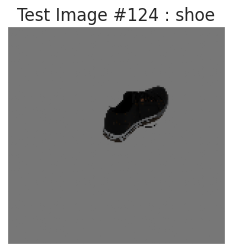

Predicted Class : 
      bag


In [ ]:
checkpredictions(np.random.randint(100,133))
#checkpredictions(122)

In [ ]:
print(classification_report(classes_valid, pred_labels))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      1.00      1.00        11
           2       0.85      1.00      0.92        11
           3       0.85      1.00      0.92        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       0.70      1.00      0.83        19
           7       0.90      1.00      0.95         9
           8       0.69      1.00      0.81        11
           9       0.86      0.43      0.57        14
          10       0.00      0.00      0.00        14

    accuracy                           0.83       133
   macro avg       0.78      0.86      0.81       133
weighted avg       0.76      0.83      0.78       133



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**오류 확인**

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

IndexError: ignored

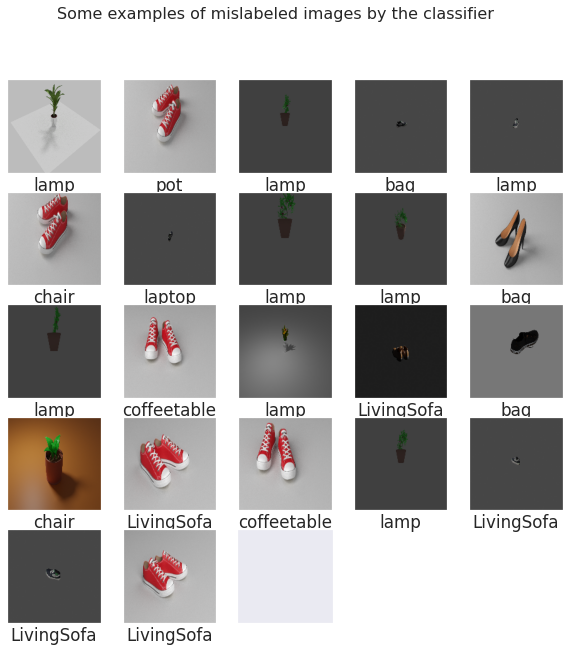

In [ ]:
#print_mislabeled_images(class_names, valid_images, classes_valid, pred_labels)

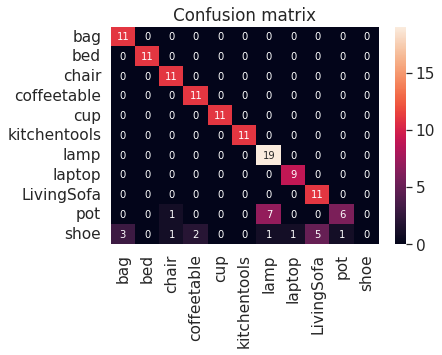

In [ ]:
CM = confusion_matrix(classes_valid, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

**결과를 주어진 csv파일에 저장하자.**

In [ ]:
name_list = []

for i in valid_filepath:
  tmp = str(i.stem) + '.png'
  name_list.append(tmp)
            

In [ ]:
class_list = []

for i in pred_labels:
  tmp = mapclass[i]
  class_list.append(tmp)

In [ ]:
dataframe = pd.DataFrame({'file_name' : name_list, 'class' : class_list})

print(dataframe)

In [ ]:
dataframe.to_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/resewr32313ult.csv', index = True, encoding = 'cp949')

**끝,,**

In [ ]:
test_name_list = []

for i in valid_filepath:
  tmp = str(i.stem) + '.png'
  test_name_list.append(tmp)
            

In [ ]:
test_class_list = []

for i in test_pred_labels:
  tmp = mapclass[i]
  test_class_list.append(tmp)